In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

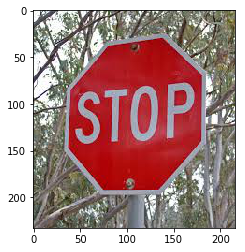

In [5]:
img = mpimg.imread("stop.jpg")
plt.imshow(img)

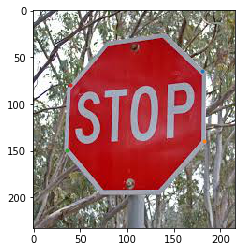

In [12]:
plt.imshow(img)
plt.plot(180, 65, '.') # top-right
plt.plot(183,140, '.') # bottom-right
plt.plot(36,149, '.') # bottom-left
plt.plot(39, 80, '.') # top-left

In [13]:
def warp(img):
    # define calibvration box in source (original) and destination (desired or warped) coordinates
    img_size = (img.shape[1], img.shape[0])
    
    # four source coordinates
    src = np.float32([[180, 65],[183,140],[36,149],[39,80]])
    # four desired coordinates
    dst = np.float32([[180, 65],[180,140],[39,140],[39,65]])
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    # Compute inverse also by swapping src and dst
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Create warped image use Linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

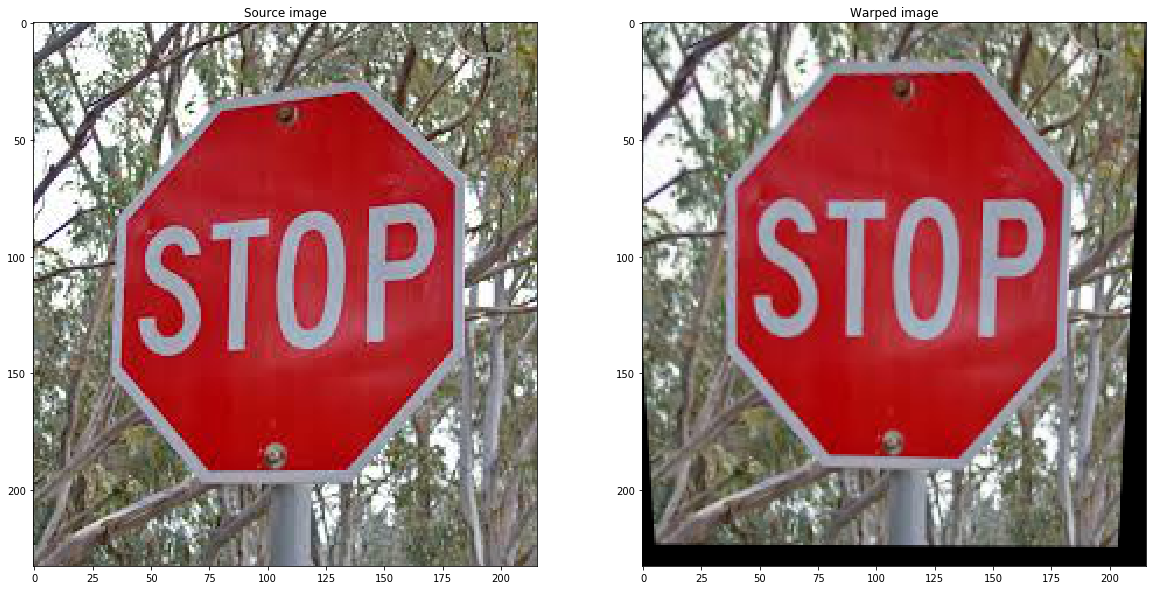

In [14]:
warped_img = warp(img)

# Visualize undistortion
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_title('Source image')
ax1.imshow(img)

ax2.set_title('Warped image')
ax2.imshow(warped_img)